# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL 
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Create a list to hold the weather data
city_data = []

# build query URL
query_url = f"{url}appid={weather_api_key}&units=imperial&q="
print(query_url)

https://api.openweathermap.org/data/2.5/weather?appid=6b8d8ead20a6d272e0251c3389660b71&units=imperial&q=


In [ ]:
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,})

    # If an error is experienced, skip the city
    except:
        print(city + " not found. Skipping...")
        pass

    record_count = record_count + 1

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
taiohae not found. Skipping...
Processing Record 3 of Set 1 | pacasmayo
Processing Record 5 of Set 1 | tarawa
Processing Record 7 of Set 1 | campechuela
Processing Record 9 of Set 1 | flying fish cove
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | goroka
Processing Record 15 of Set 1 | tamanrasset
Processing Record 17 of Set 1 | nogliki
Processing Record 19 of Set 1 | grytviken
Processing Record 21 of Set 1 | puerto natales
Processing Record 23 of Set 1 | karratha
Processing Record 25 of Set 1 | punta arenas
Processing Record 27 of Set 1 | yellowknife
Processing Record 29 of Set 1 | al abyar
Processing Record 31 of Set 1 | iqaluit
Processing Record 33 of Set 1 | puerto deseado
Processing Record 35 of Set 1 | kavieng
Processing Record 37 of Set 1 | olonkinbyen
Processing Record 39 of Set 1 | remire-montjoly
Processing Record 41 of Set 1 | port elizabeth
P

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pacasmayo,-7.4006,-79.5714,74.68,72,99,11.77,PE,1736188107
1,tarawa,1.4190,172.9840,80.69,83,75,6.91,KI,1736188108
2,campechuela,20.2342,-77.2789,78.85,56,94,6.42,CU,1736188109
3,flying fish cove,-10.4217,105.6791,78.48,94,75,5.75,CX,1736188111
4,port-aux-francais,-49.3500,70.2167,43.18,82,24,19.86,TF,1736188112


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data_file", index=False)


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

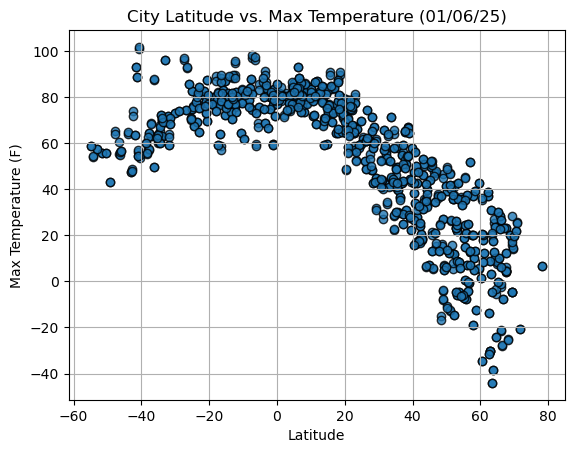

This plot shows the relationship between the latitude of the city and the maximum temperature of the city. The plot shows that the temperature is higher near the equator and decreases as we move away from the equator.


In [51]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City Lat vs Max Temp.png")

# Show plot
plt.show()

print("This plot shows the relationship between the latitude of the city and the maximum temperature of the city. The plot shows that the temperature is higher near the equator and decreases as we move away from the equator.")

#### Latitude Vs. Humidity

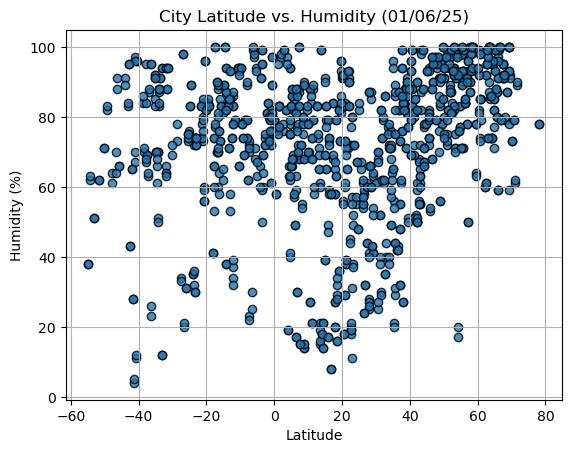

This plot shows the relationship between the latitude of the city and the humidity of the city. The plot shows that the humidity is higher near the equator and decreases as we move away from the equator.


In [52]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City Lat vs Humidity.png")

# Show plot
plt.show()

print("This plot shows the relationship between the latitude of the city and the humidity of the city. The plot shows that the humidity is higher near the equator and decreases as we move away from the equator.")

#### Latitude Vs. Cloudiness

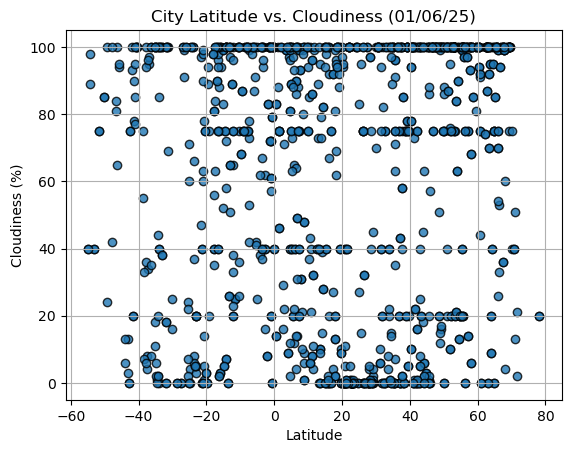

This plot shows the relationship between the latitude of the city and the cloudiness of the city. The plot shows that the cloudiness is higher near the equator and decreases as we move away from the equator.


In [53]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City Lat vs Cloudiness.png")

# Show plot
plt.show()

print("This plot shows the relationship between the latitude of the city and the cloudiness of the city. The plot shows that the cloudiness is higher near the equator and decreases as we move away from the equator.")

#### Latitude vs. Wind Speed Plot

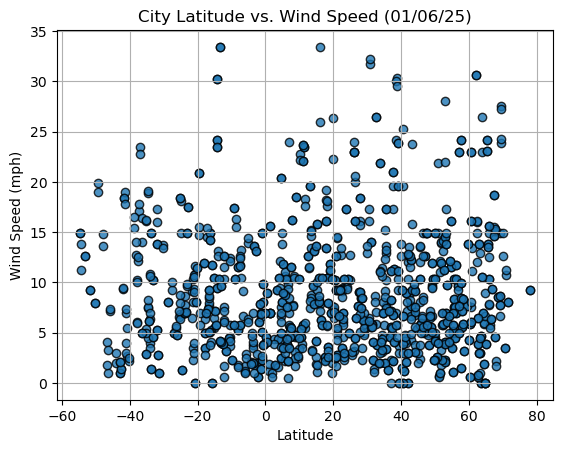

This plot shows the relationship between the latitude of the city and the wind speed of the city. The plot shows that the wind speed is higher near the equator and decreases as we move away from the equator.


In [54]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City Lat vs Wind Speed.png")

# Show plot
plt.show()

print("This plot shows the relationship between the latitude of the city and the wind speed of the city. The plot shows that the wind speed is higher near the equator and decreases as we move away from the equator.")

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,tarawa,1.4190,172.9840,80.69,83,75,6.91,KI,1736188108
2,campechuela,20.2342,-77.2789,78.85,56,94,6.42,CU,1736188109
6,tamanrasset,22.7850,5.5228,58.91,20,0,4.61,DZ,1736188114
7,nogliki,51.8333,143.1667,5.54,97,95,13.94,RU,1736188115
12,yellowknife,62.4560,-114.3525,-13.59,92,100,14.97,CA,1736187844


In [56]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pacasmayo,-7.4006,-79.5714,74.68,72,99,11.77,PE,1736188107
3,flying fish cove,-10.4217,105.6791,78.48,94,75,5.75,CX,1736188111
4,port-aux-francais,-49.3500,70.2167,43.18,82,24,19.86,TF,1736188112
5,goroka,-6.0834,145.3873,59.58,97,87,1.05,PG,1736188113
8,grytviken,-54.2811,-36.5092,54.14,62,98,11.25,GS,1736188116


In [75]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")

    plt.show()

###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8764689576855584


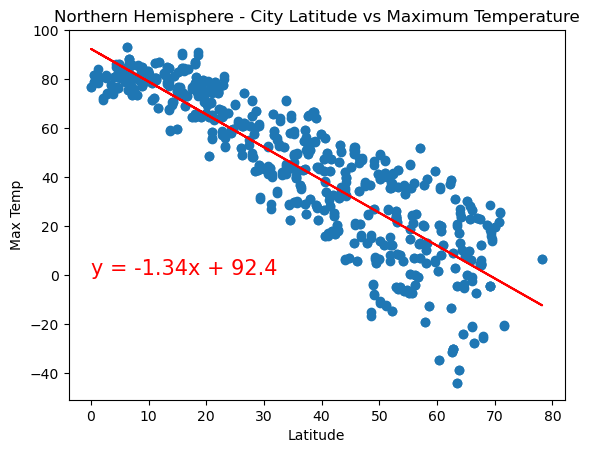

In [76]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title("Northern Hemisphere - City Latitude vs Maximum Temperature")
plot_linear_regression(x_values, y_values, 'Max Temp', (0, 0))

The r-squared is: 0.5338020402348506


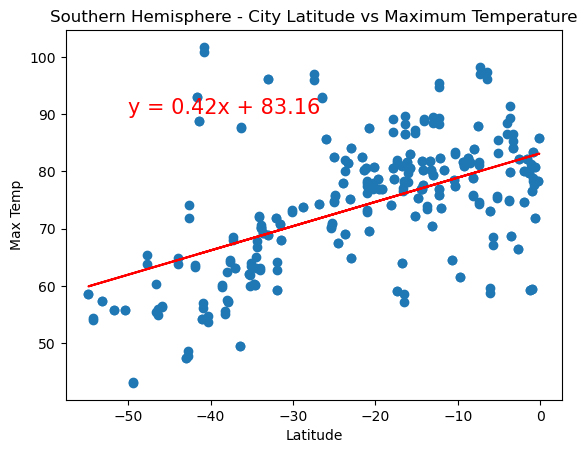

In [77]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title("Southern Hemisphere - City Latitude vs Maximum Temperature")
plot_linear_regression(x_values, y_values, 'Max Temp', (-50, 90))


**Comparison of Results**: City Latitude vs Max Temperature

* _Northern Hemisphere_: It can be seen that with the linear regression analysis, there is a negative slope, indicating that maximum temperatures decrease as latitude values increase. This is overall consistent with the expectation that regions closer to the equator are warmer. 

* _Southern Hemisphere_: The analysis shows a postive slope, but since latitudes are negative, the interpretation remains that temperatures decrease as one moves further from the equator. 

Conclusion: The linear regression analyses for both hemispheres confirm that there is a significant linear relationship between latitude and maximum temperature. In both hemispheres, maximum temperatures tend to decrease as one moves away from the equator. This relationship is reflected in the negative slopes of the regression lines for both hemispheres. Understanding this relationship helps in predicting climatic conditions based on geographic location and can be useful for various applications in environmental science and urban planning.

By performing these analyses, we can better understand the climatic patterns and how they are influenced by geographic factors such as latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.42203975193904775


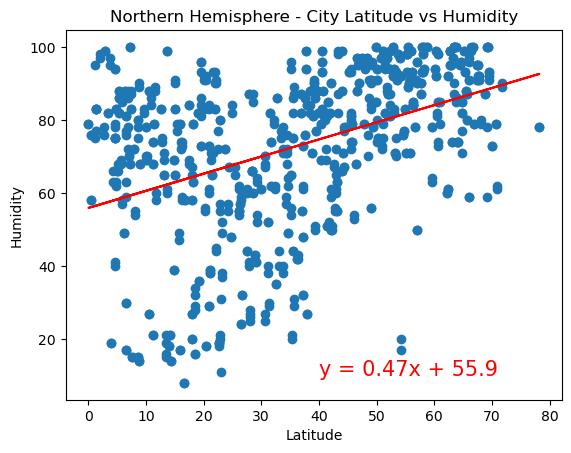

In [78]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title("Northern Hemisphere - City Latitude vs Humidity")
plot_linear_regression(x_values, y_values, 'Humidity', (40, 10))

The r-squared is: 0.1793909751425885


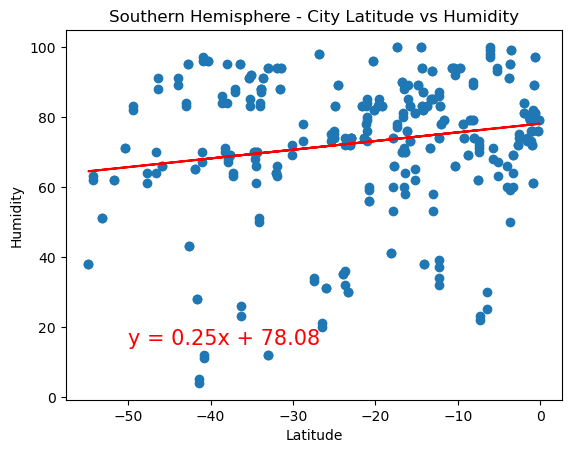

In [79]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title("Southern Hemisphere - City Latitude vs Humidity")
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 15))


**Comparison of Results**: City Latitude vs Humidity 

* _Northern Hemisphere_: The linear regression analysis shows that a strong linear relationship. The slope indicates how humidity changes with latiude. The positive slope indicates that hudmidity increases as one moves away from the equator. 

* _Southern Hemisphere_: The analysis shows that is only a slight correlation between city latitude and humidity. Since the latitudes are negative, the interpretation remains that the slope indicates how humidity changes as one moves further from the equator. 

Conclusion: The linear regression analyses for both hemispheres provide insights into the relationship between latitude and humidity. The slopes of the regression lines indicate whether humidity tends to increase or decrease as one moves away from the equator. Understanding this relationship is important for predicting climatic conditions and can be useful for various applications in environmental science and urban planning.

By examining the plots and the regression results, we can better understand how geographic factors such as latitude influence humidity levels in different parts of the world. This knowledge helps in making informed decisions related to climate and weather forecasting.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.21491981191962528


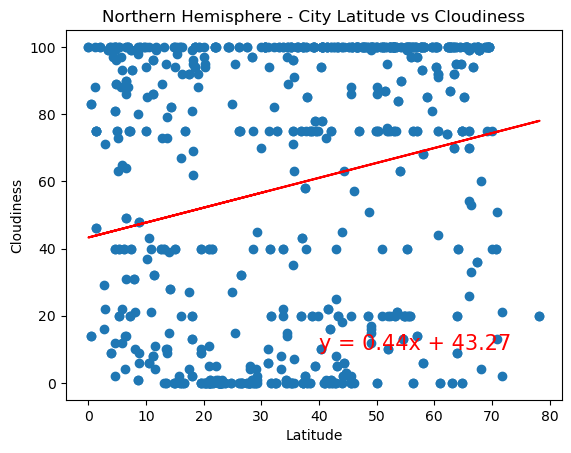

In [80]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title("Northern Hemisphere - City Latitude vs Cloudiness")
plot_linear_regression(x_values, y_values, 'Cloudiness', (40, 10))


The r-squared is: 0.12395509635032374


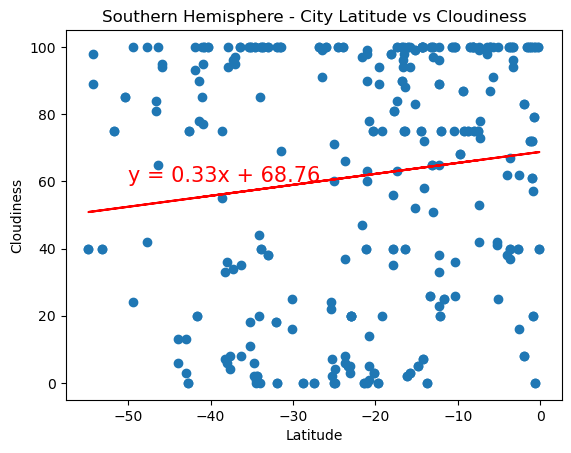

In [81]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title("Southern Hemisphere - City Latitude vs Cloudiness")
plot_linear_regression(x_values, y_values, 'Cloudiness', (-50, 60))

**Comparison of Results**: City Latitude vs Cloudiness

* _Northern Hemisphere_: The slope of the regression line indicates how cloudiness changes with latitude. A postive slope suggest increasing latitude as one moves further south from the equator, increases cloudiness. 

* _Southern Hemisphere_: Similarly, the slope of the regression line indicates how cloudiness changes with latitude. The postive slope suggests that increasing cloudiness increases with moving south and changes in latitude. 

Conclusion: The linear regression analyses for both hemispheres reveal that there is a linear relationship between latitude and cloudiness. The direction and magnitude of the slopes provide insights into how cloudiness varies with latitude in each hemisphere. Understanding these relationships helps in predicting climatic patterns and can be useful for weather forecasting and environmental planning.

By comparing the results from both hemispheres, we can observe whether the trends in cloudiness with respect to latitude are consistent or if there are notable differences. This comparative analysis enhances our understanding of how geographic factors influence cloudiness globally.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.043670785317579654


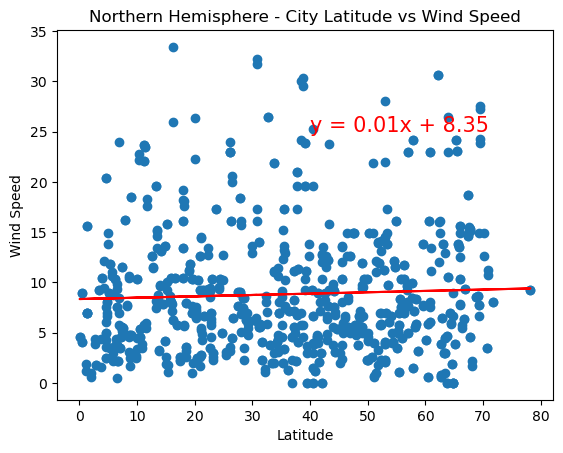

In [82]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title("Northern Hemisphere - City Latitude vs Wind Speed")
plot_linear_regression(x_values, y_values, 'Wind Speed', (40, 25))

The r-squared is: -0.14139059367033796


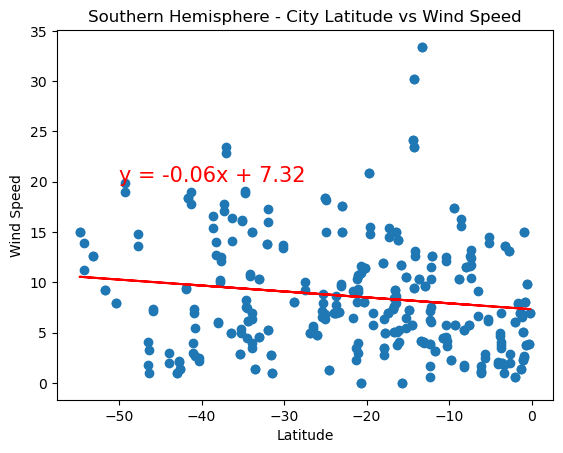

In [83]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title("Southern Hemisphere - City Latitude vs Wind Speed")
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))


**Comparison of Results**: City Latitude vs Wind Speed

* _Northern Hemisphere_: Per the results, it can be infered that the slope of the regression line indicates how wind speed changes with latitude. However since the fitted line shows little to no movement, it can be said that there is very little correlation between latitude and wind speed. 

* _Southern Hemisphere_: The slope of the regression line indicates a negative slope, suggesting that wind speed decreases with increasing latitude. 

Conclusion: The linear regression analyses for both hemispheres reveal that there is a linear relationship between latitude and wind speed. The direction and magnitude of the slopes provide insights into how wind speed varies with latitude in each hemisphere. Understanding these relationships helps in predicting climatic patterns and can be useful for weather forecasting and environmental planning.

By comparing the results from both hemispheres, we can observe whether the trends in wind speed with respect to latitude are consistent or if there are notable differences. This comparative analysis enhances our understanding of how geographic factors influence wind speed globally.

In [ ]:
# Data was extracted from OpenWeatherMap API (2012—2025 OpenWeather; All Rights Reserved)